In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.fft import rfft
%matplotlib inline

In [18]:
da=np.load('../../data/data.1tone2tone.npz.npy')
print da.dtype, len(da)
dt=1/1.25e9*2**27
print dt,'s', 
t=np.arange(len(da))*dt
t=np.arange(len(da))*dt
ttot=t[-1]
print ttot,"s total"

[('freq', '<f4'), ('chan1', '<f4'), ('chan2', '<f4'), ('chanXR', '<f4'), ('chanXI', '<f4')] 396220
0.1073741824 s 42543.6911763 s total


In [6]:
#running mean
def rm(x, N):
    return pd.rolling_mean(x,N)[N-1::N]

In [7]:
Na=len(da)/1000 ## want 500 samples at the end
ta=rm(t,Na)/3600. # in hours
freq=rm(da['freq'],Na)
ch1=rm(da['chan1'],Na)/1e19
ch2=rm(da['chan2'],Na)/1e19
chxr=rm(da['chanXR'],Na)/1e19
chxi=rm(da['chanXI'],Na)/1e19
chxa=np.sqrt(chxi**2+chxr**2)
chxp=np.arctan(chxi,chxr)

/home/anze/local/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  app.launch_new_instance()


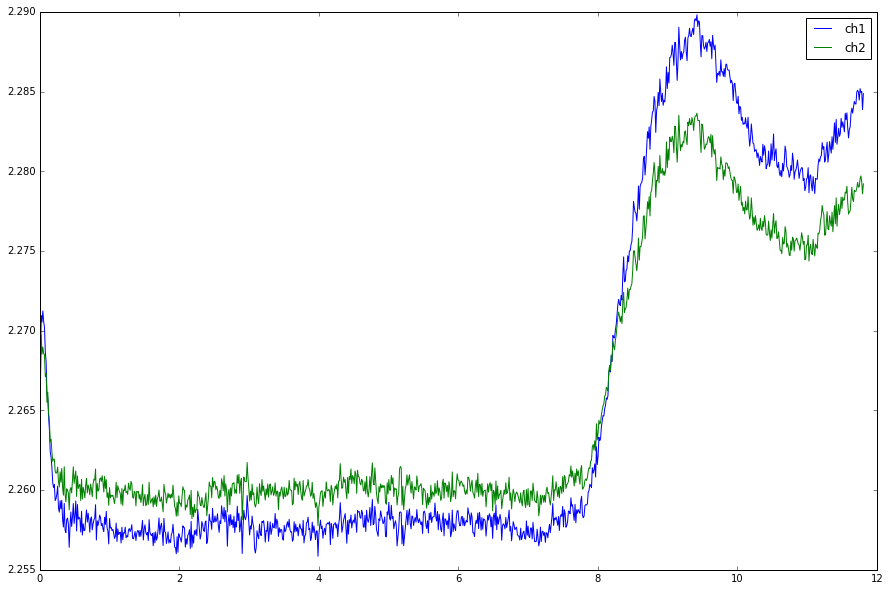

In [8]:
plt.figure(figsize=(15,10))
fa=(ch1/ch2).mean()
plt.plot(ta,ch1, label='ch1')
plt.plot(ta,ch2*fa, label='ch2')
plt.legend()

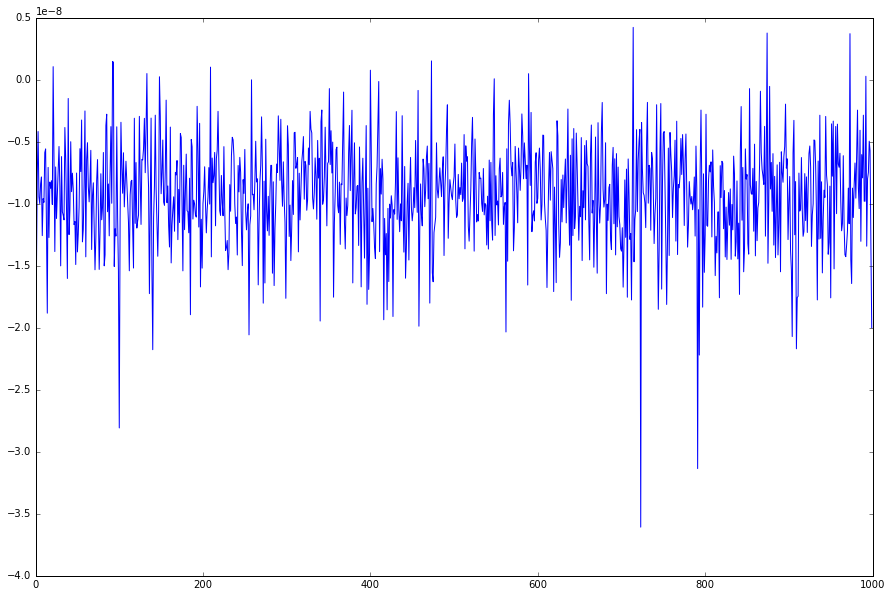

In [9]:
plt.figure(figsize=(15,10))
plt.plot(chxa/np.sqrt(ch1*ch2)-1)

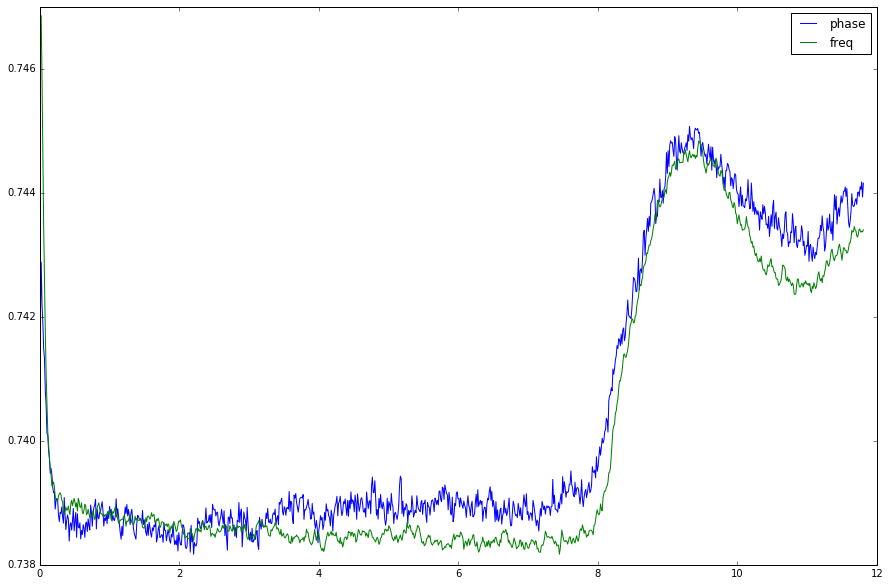

In [10]:
plt.figure(figsize=(15,10))
plt.plot(ta,chxp,label='phase')
plt.plot(ta,freq/70+0.766,label='freq')
plt.legend()

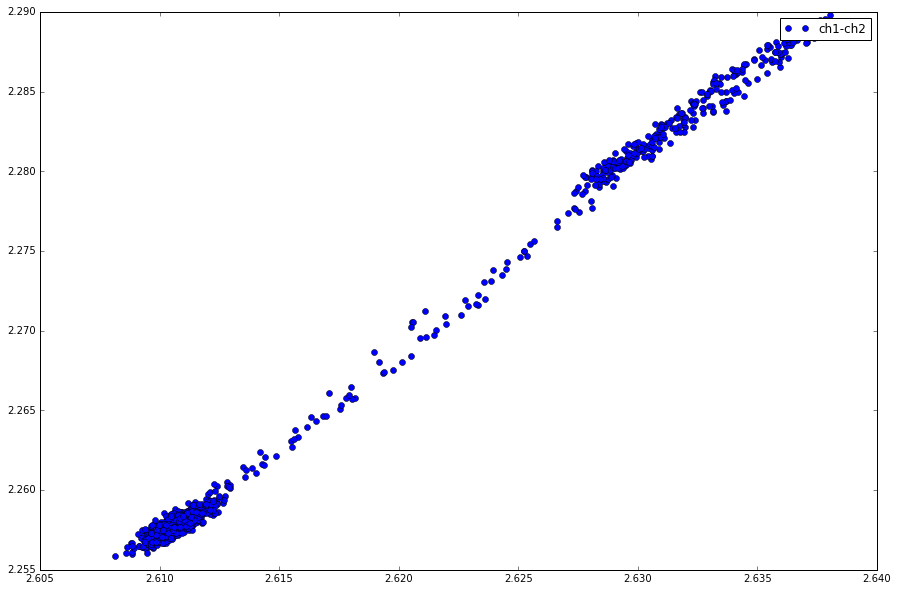

In [11]:
plt.figure(figsize=(15,10))
plt.plot(ch2,ch1,'bo',label='ch1-ch2')
plt.legend()

In [35]:
def getps (ar,fa,ar2=None):
    ft=rfft(ar)/ar.mean()
    if ar2 is None:
        ft=ft[1:]
        pk=abs(ft**2)
    else:
        ft2=rfft(ar2)/ar2.mean()
        pk=abs(ft*np.conj(ft2))
    freq=(np.arange(len(pk))+1)/ttot
    #print freq[-1], len(pk), len(ar)
    if (fa==1.0):
        return freq,pk
    ## log binning
    st,step=0,1.
    lpk=[]
    lfr=[]
    while True:
        if (st>len(pk)):
            break
        lpk.append(pk[st:st+int(step)].mean())
        lfr.append(freq[st:st+int(step)].mean())
        st+=int(step)
        step*=fa
        

    return np.array(lfr),np.array(lpk)

In [36]:
freq,pkch1=getps(da['chan1'],1.2)
freq,pkch2=getps(da['chan2'],1.2)
freq,pkchx=getps(da['chan1'],1.2,da['chan2'])

[]

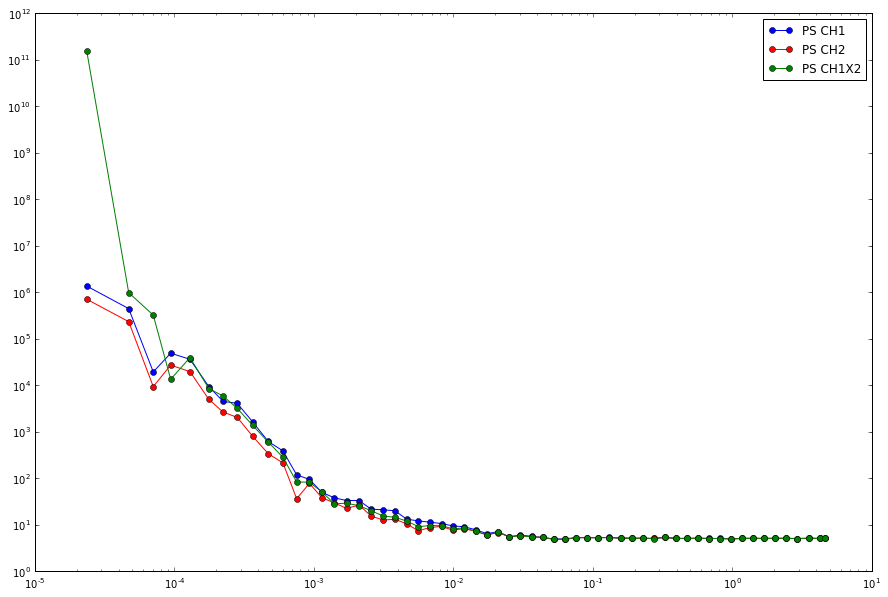

In [37]:
plt.figure(figsize=(15,10))
plt.plot(freq,pkch1,'bo-',label='PS CH1')
plt.plot(freq,pkch2,'ro-',label='PS CH2')
plt.plot(freq,pkchx,'go-',label='PS CH1X2')
plt.legend()
plt.loglog()

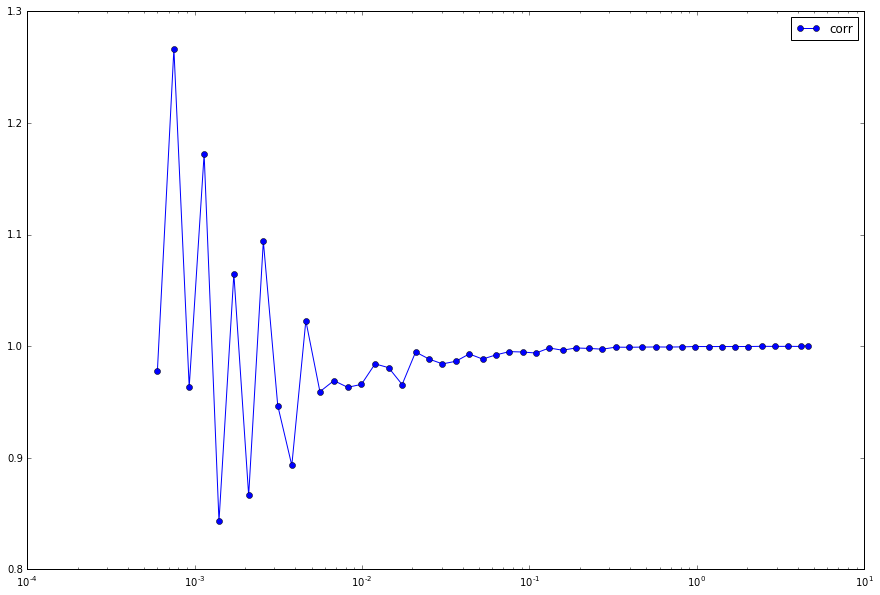

In [38]:
plt.figure(figsize=(15,10))
ai=10
plt.plot(freq[ai:],pkchx[ai:]/np.sqrt(pkch1[ai:]*pkch2[ai:]),'bo-',label='corr')
plt.semilogx()
plt.legend()